# Question

Problem Statement:
    
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.shape

(400, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
# Make condition for Sales column

sales_value = []
for values in data['Sales']:
    if values < 7.5 :
        sales_value.append("low")
    else:
        sales_value.append("High")

In [6]:
data["sales_value"] = sales_value

In [7]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_value
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low


In [8]:
label_encoder = preprocessing.LabelEncoder()
data['sales_value']= label_encoder.fit_transform(data['sales_value'])

In [9]:
label_encoder = preprocessing.LabelEncoder()
data['Urban']= label_encoder.fit_transform(data['Urban'])

In [10]:
label_encoder=preprocessing.LabelEncoder()
data['US']=label_encoder.fit_transform(data['US'])

In [11]:
data['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [12]:
data['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [13]:
label_encoder=preprocessing.LabelEncoder()
data['ShelveLoc']=label_encoder.fit_transform(data['ShelveLoc'])

In [14]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_value
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [15]:
x=data.iloc[:,1:11]
y=data['sales_value']

In [16]:
# x.drop(["ShelveLoc"],axis=1,inplace=True)
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [14]:
colnames = list(data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [18]:
# Splitting data in to training and testing process


x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

### Buil a Decision Tree Clasifier using Entropy

In [19]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

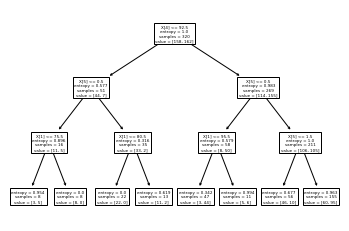

In [20]:
#Ploting the decision tree

tree.plot_tree(model);

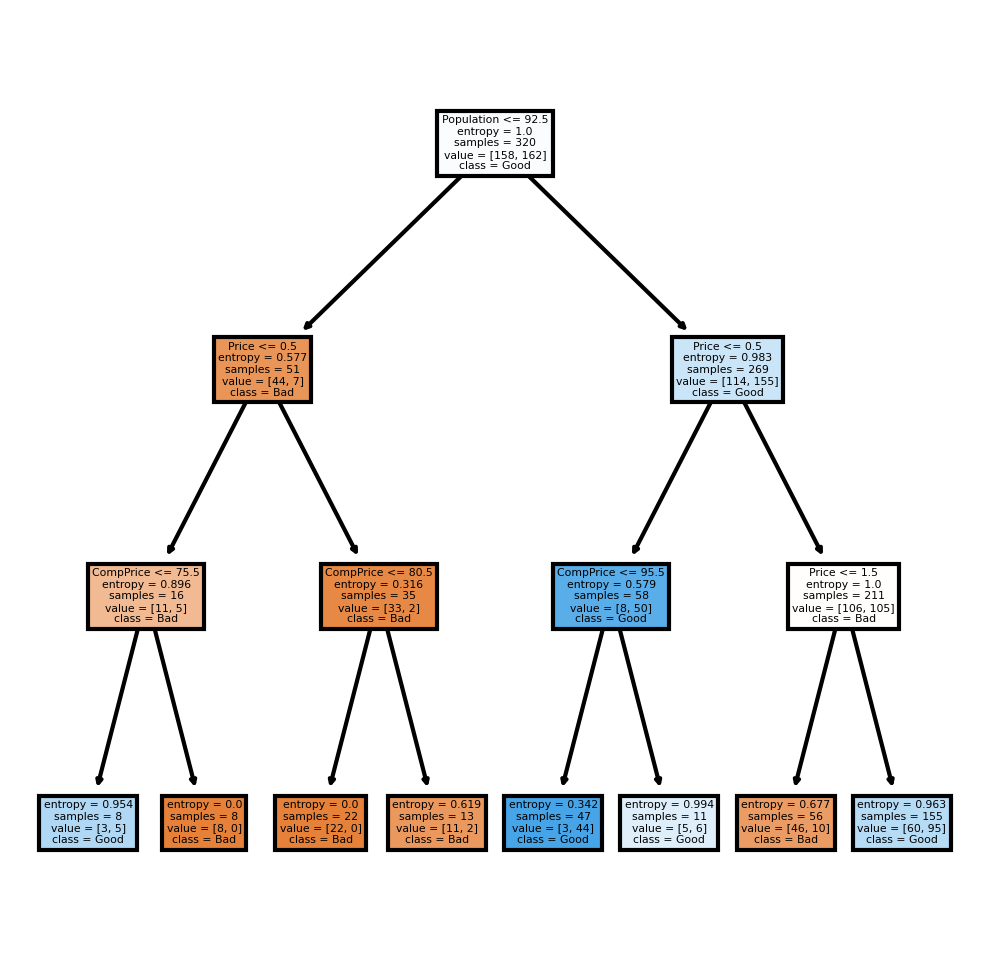

In [21]:
fn=['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban',
 'US']

cn=['Bad', 'Good', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [22]:
#Predicting on test data

# predicting on test data set
prediction = model.predict(x_test) 

# getting the count of each category  
pd.Series(prediction).value_counts()

1    58
0    22
dtype: int64

In [23]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
# getting the two way table to understand the correct and wrong predictions

pd.crosstab(y_test,prediction)

col_0,0,1
sales_value,,
0,19,22
1,3,36


In [25]:
# Accuracy Measuring


np.mean(prediction==y_test)

0.6875

##### 68.75% accuracy measured

### With Gini Criteria build a Decision Tree Classifier

In [26]:
model2_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [27]:
model2_gini

DecisionTreeClassifier(max_depth=5)

In [28]:
model2_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=5)

In [33]:
# Predicting on test data

prediction2=model2_gini.predict(x_test)

In [34]:
prediction2

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [35]:
pd.Series(prediction2).value_counts()

1    46
0    34
dtype: int64

In [36]:
np.mean(prediction2==y_test)

0.7375

##### Accuray is 73.75%

### 3. Decision Tree Regression

In [37]:
from sklearn.tree import DecisionTreeRegressor


model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train) 

DecisionTreeRegressor()

In [38]:
# accuracy

model3.score(x_test,y_test)

0.29956222639149455